In [1]:
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, ElasticNet, SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import matplotlib
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, mean_squared_error, mean_absolute_error
import random

plt.rcParams.update({'font.size': 24})

# Data generation

In [2]:
def generateLinear(n, a, b, noise):
    X = np.linspace(-2, 2, n)
    noise = np.random.normal(0, noise, n)
    Y = a * X + b + noise
    return X, Y
    
def generateNonLinear(n, a, b, c, noise):
    X = np.linspace(-2, 2, n)
    noise = np.random.normal(0, noise, n)
    Y = a*X**3 + b*X + c + noise
    return X, Y

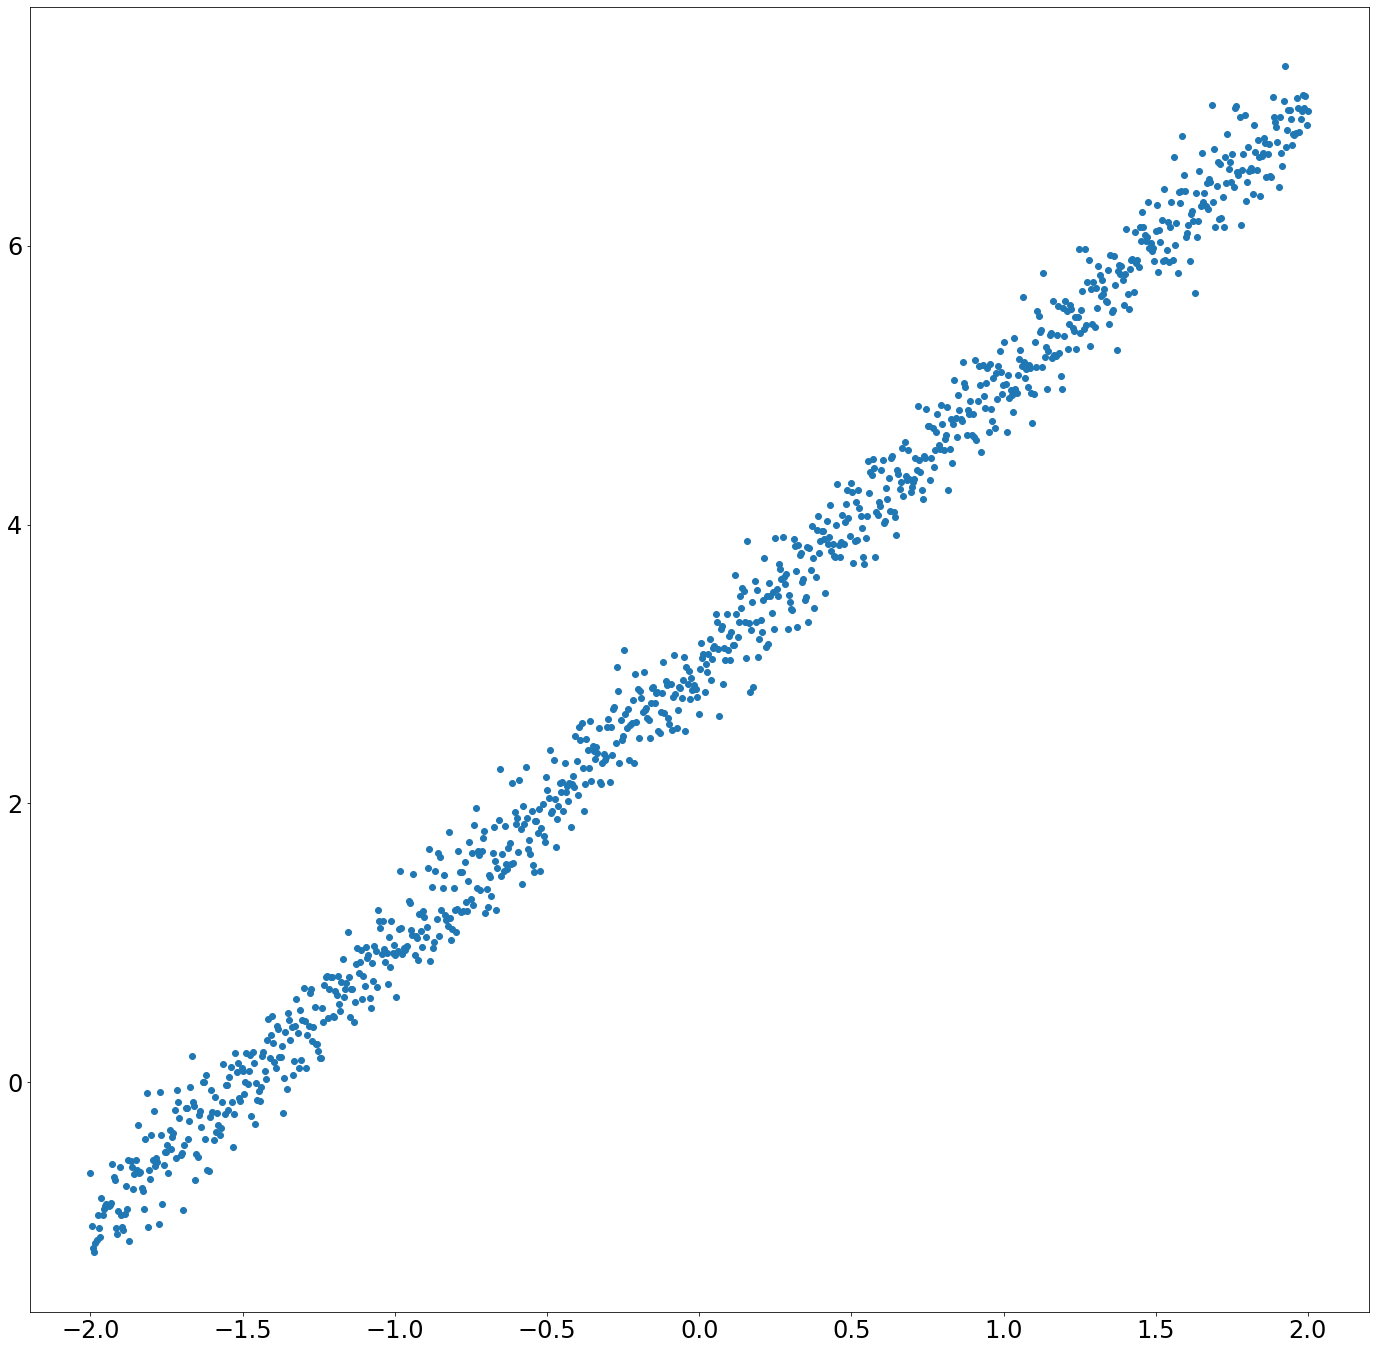

In [3]:
X, Y = generateLinear(1000, 2, 3, 0.2)

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X, Y)
plt.show()

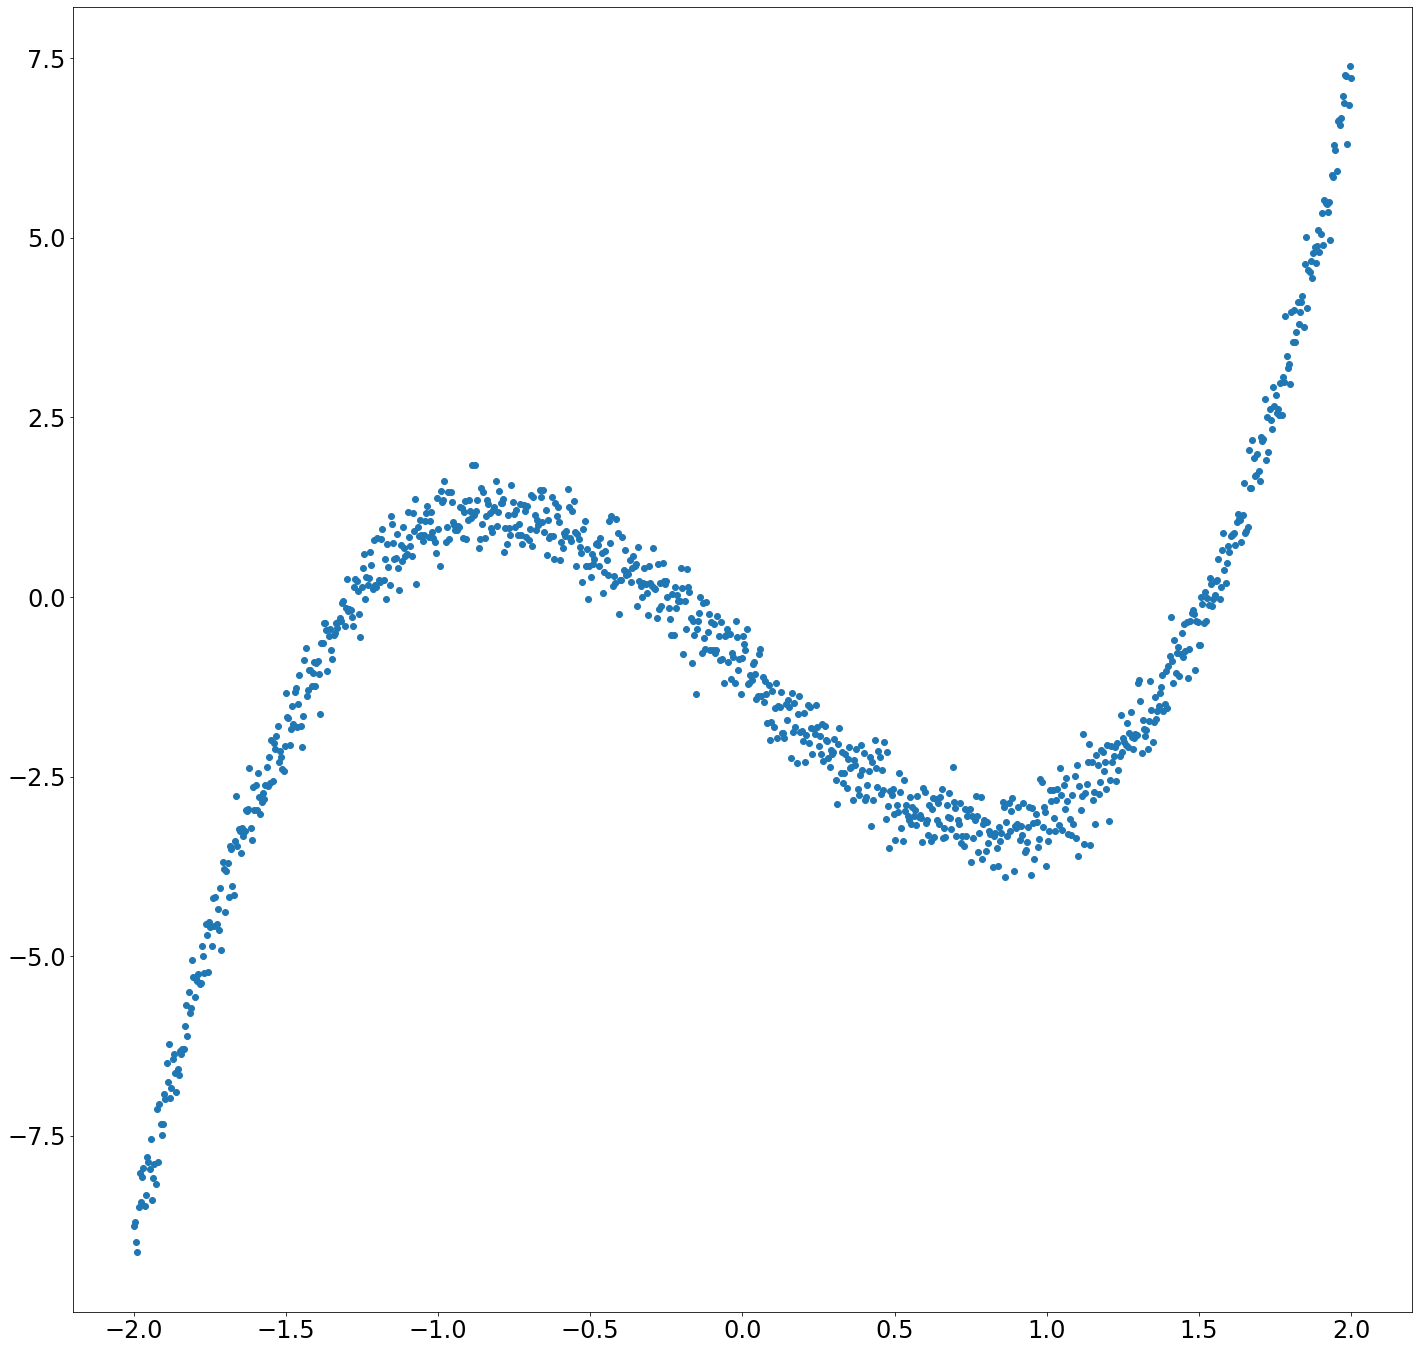

In [4]:
X, Y = generateNonLinear(1000, 2, -4, -1, 0.3)

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X, Y)
plt.show()

---

# Linear data analysis

# No noise

In [5]:
X, Y = generateLinear(100, 2, 3, 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 0
deg = 0
linearity = True

## Model generation

In [6]:
linear_regression = LinearRegression()
huber = HuberRegressor()
ridge = Ridge()
elastic_net = ElasticNet(alpha=1e-4, tol=1e-15)
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15)


## Model learning

In [7]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', loss='huber', tol=1e-15)

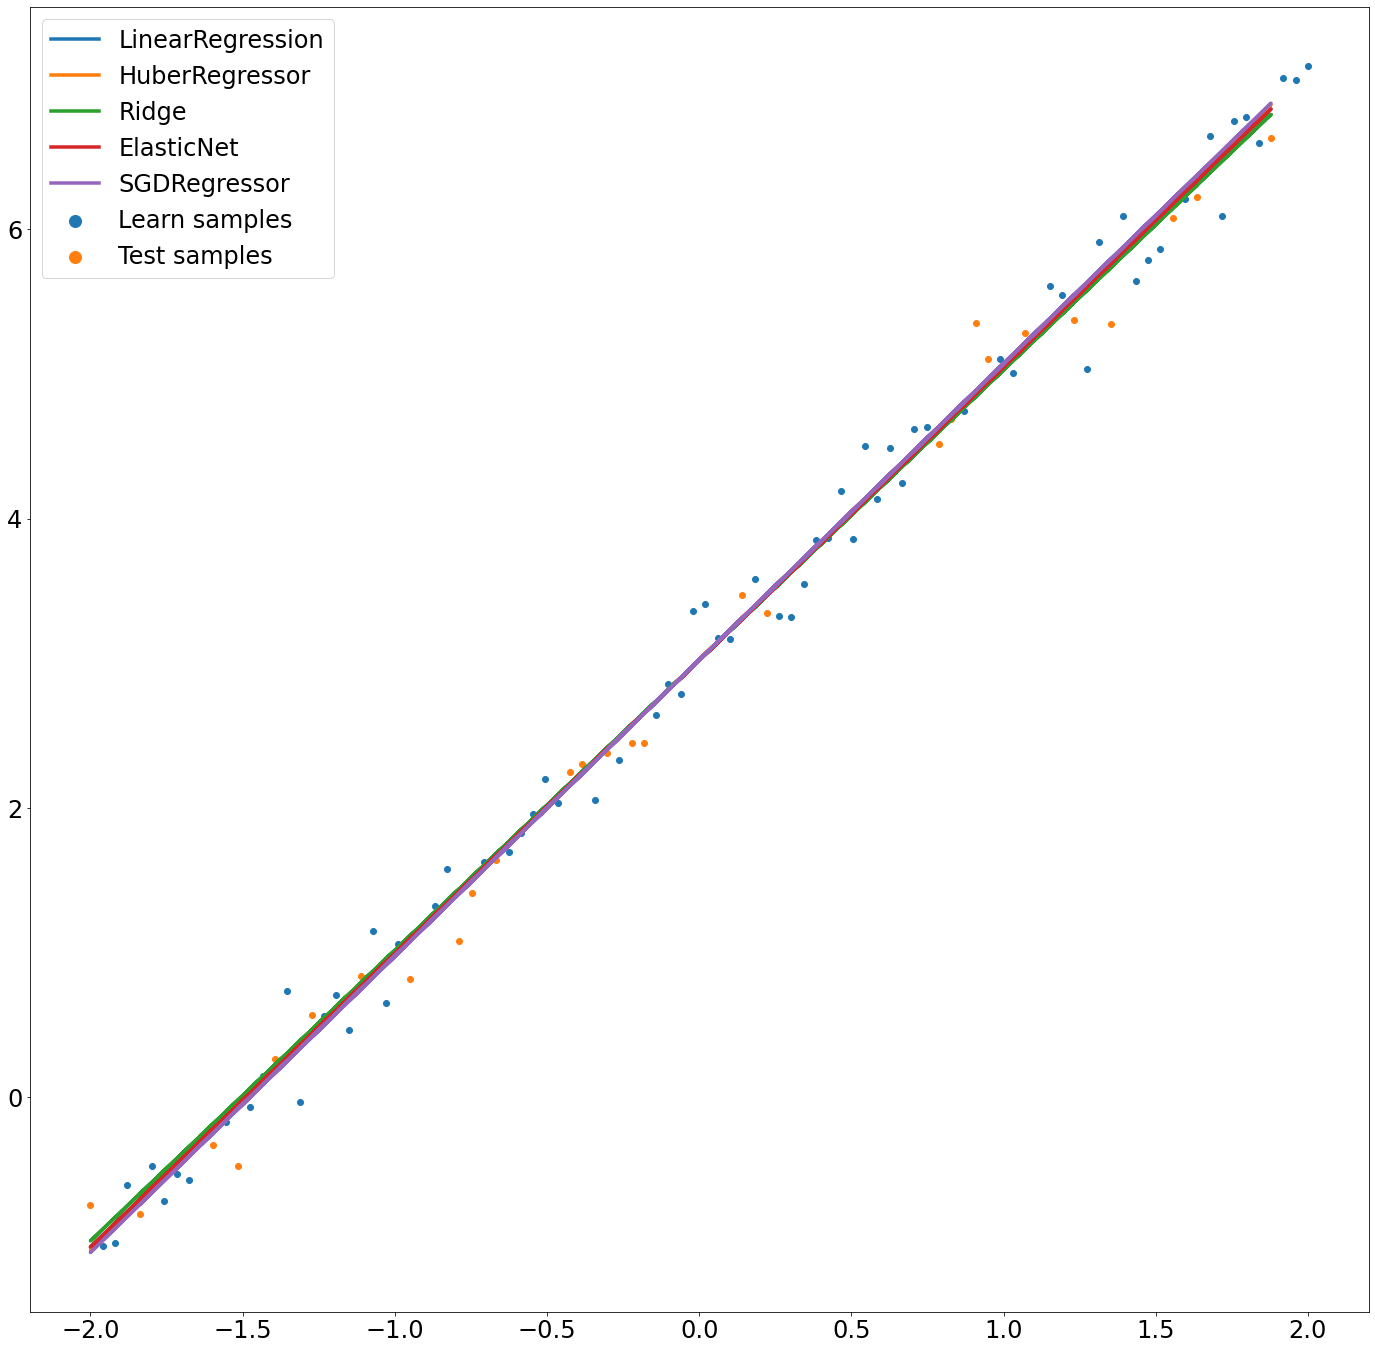

In [8]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")
for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

# MSE and MAE

In [9]:
df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# 10 samples with noise

In [10]:
X, Y = generateLinear(100, 2, 3, 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 10
index = random.sample(range(y_train.shape[0]), n_samples)
y_train[index] += np.abs(np.random.normal(0.0, 8, n_samples))

## Model generation

In [11]:
linear_regression = LinearRegression()
huber = HuberRegressor()
ridge = Ridge()
elastic_net = ElasticNet(alpha=1e-4, tol=1e-15)
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15)


## Model learning

In [12]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', loss='huber', tol=1e-15)

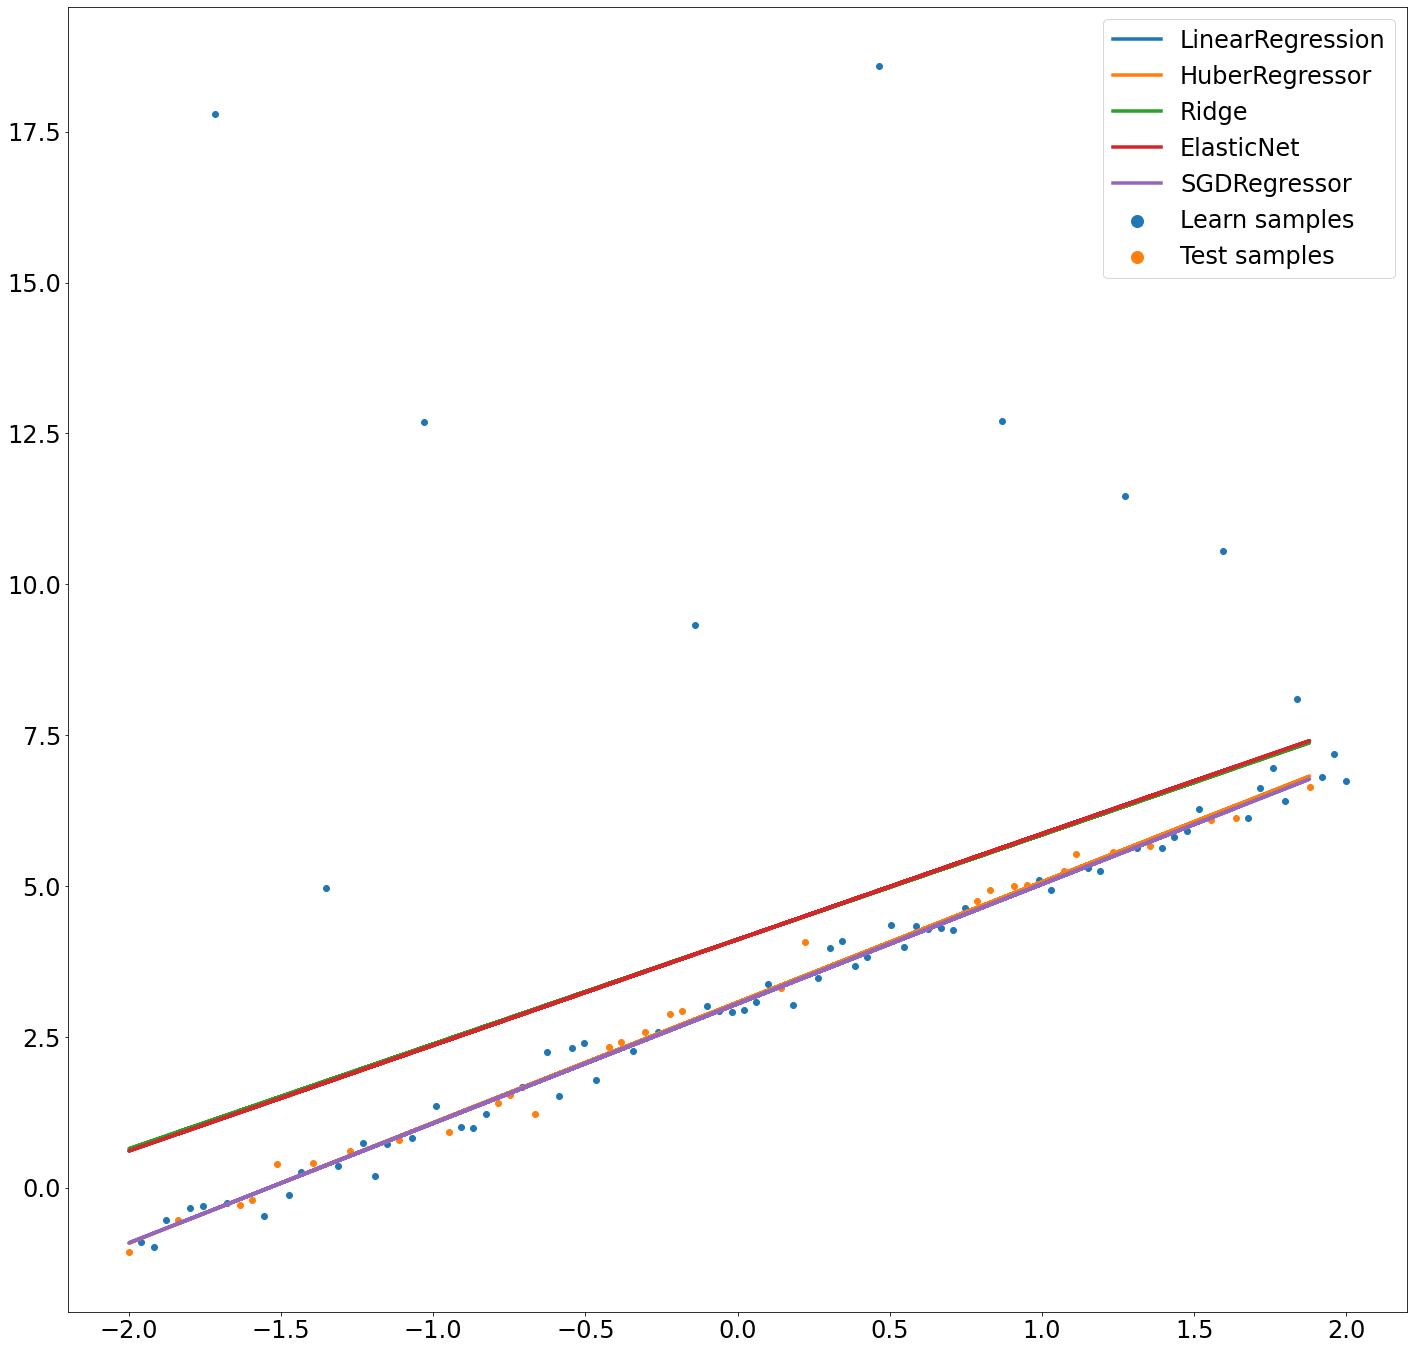

In [13]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")
for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

# MSE and MAE

In [14]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

---

# Non-linear data analysis

# No noise

In [15]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
linearity = False
n_samples = 0

## Model generation

In [16]:
linear_regression = LinearRegression()
huber = HuberRegressor()
ridge = Ridge()
elastic_net = ElasticNet(alpha=1e-4, tol=1e-15)
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15)


## Model learning

In [17]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', loss='huber', tol=1e-15)

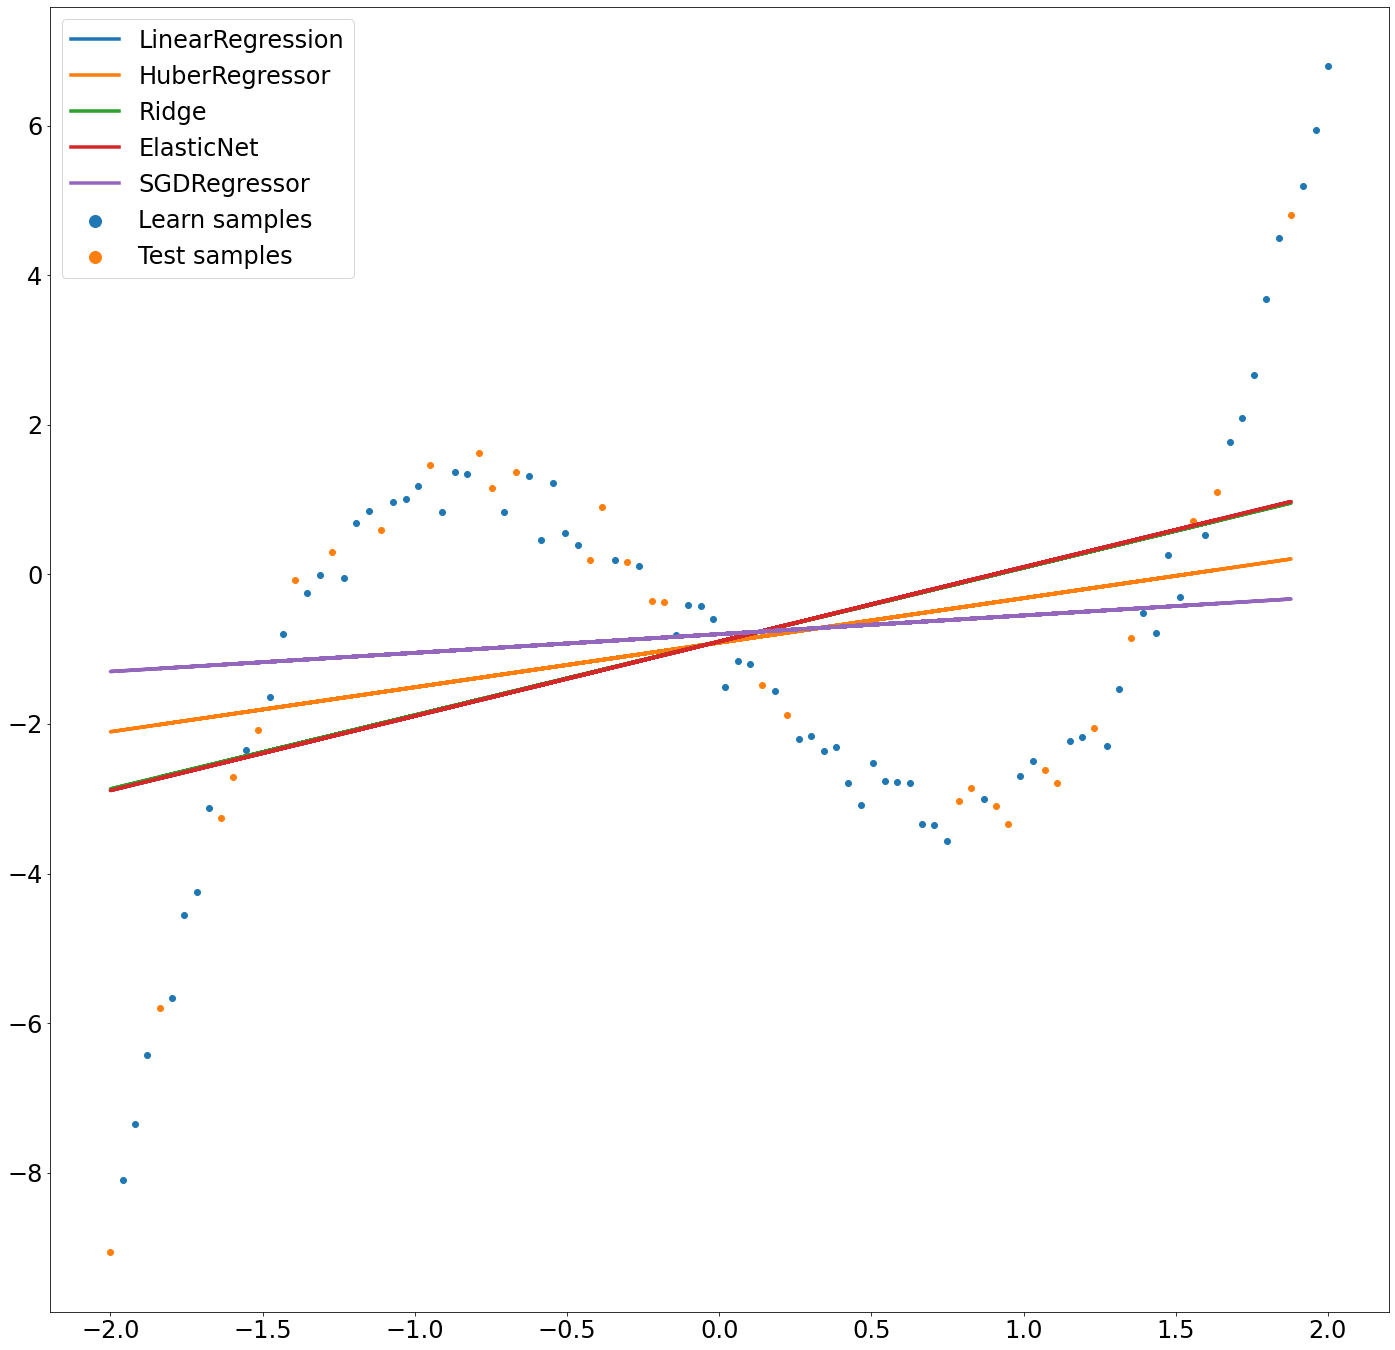

In [18]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")
for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

# MSE and MAE

In [19]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# 10 Samples with noise

In [20]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 10
index = random.sample(range(y_train.shape[0]), n_samples)
y_train[index] += np.abs(np.random.normal(0.0, 8, n_samples))

## Model generation

In [21]:
linear_regression = LinearRegression()
huber = HuberRegressor()
ridge = Ridge()
elastic_net = ElasticNet(alpha=1e-4, tol=1e-15)
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15)


## Model learning

In [22]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(learning_rate='constant', loss='huber', tol=1e-15)

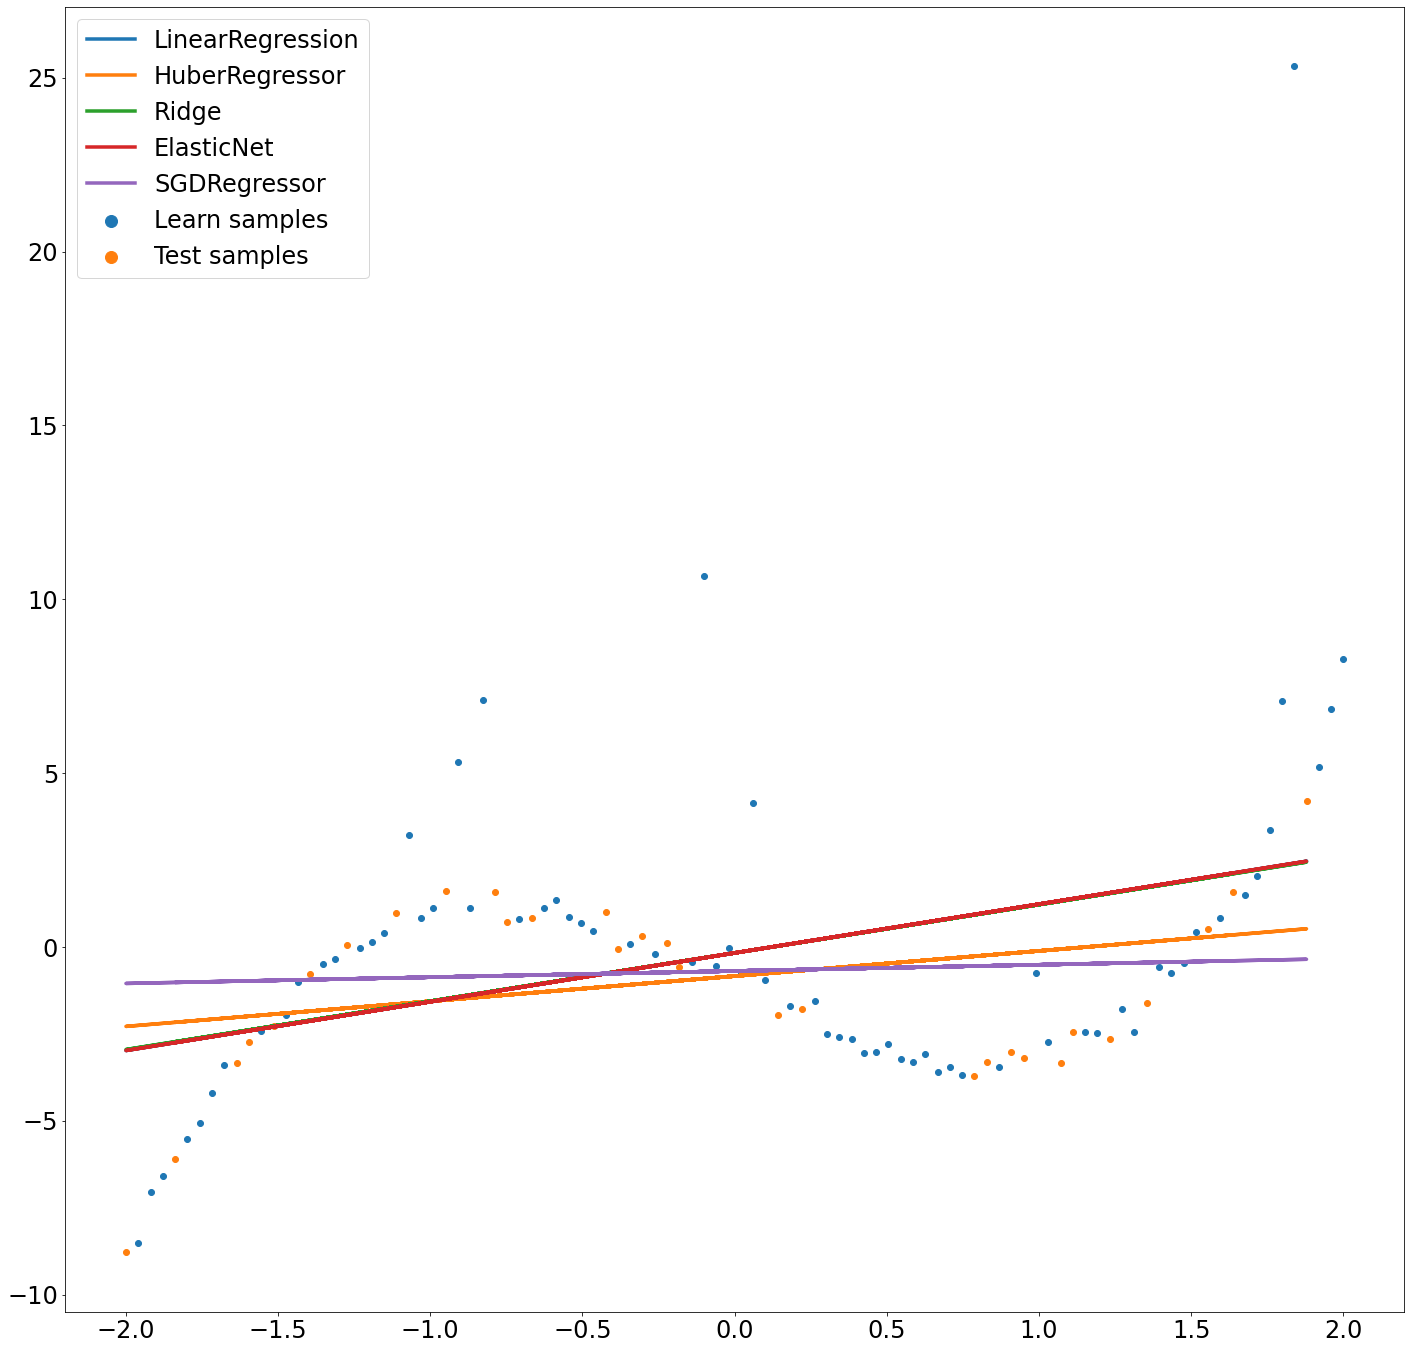

In [23]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")
for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

# MSE and MAE

In [24]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

---

# PolynomialFeatures

# No noise

# Deg = 2

In [25]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 0

In [26]:
deg = 2

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [27]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(2,))

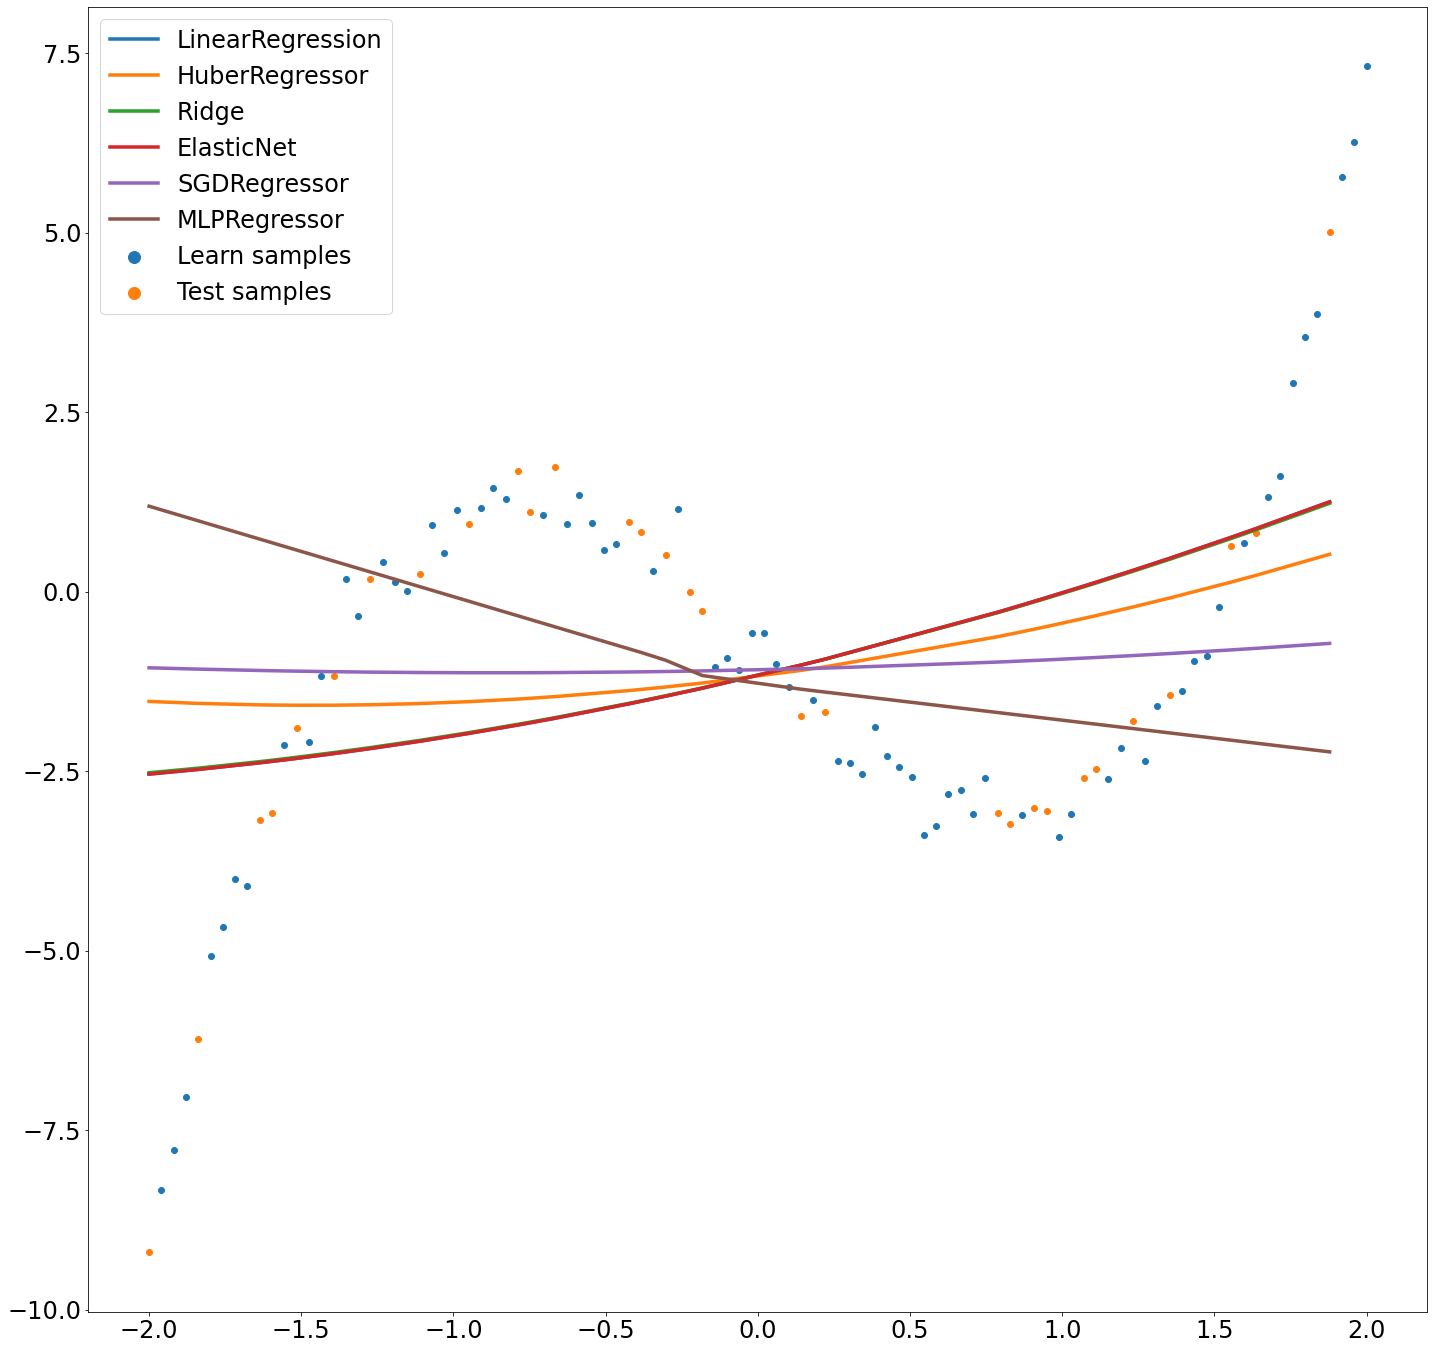

In [28]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [29]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# Deg = 3

In [30]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

In [31]:
deg = 3

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [32]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(30,))

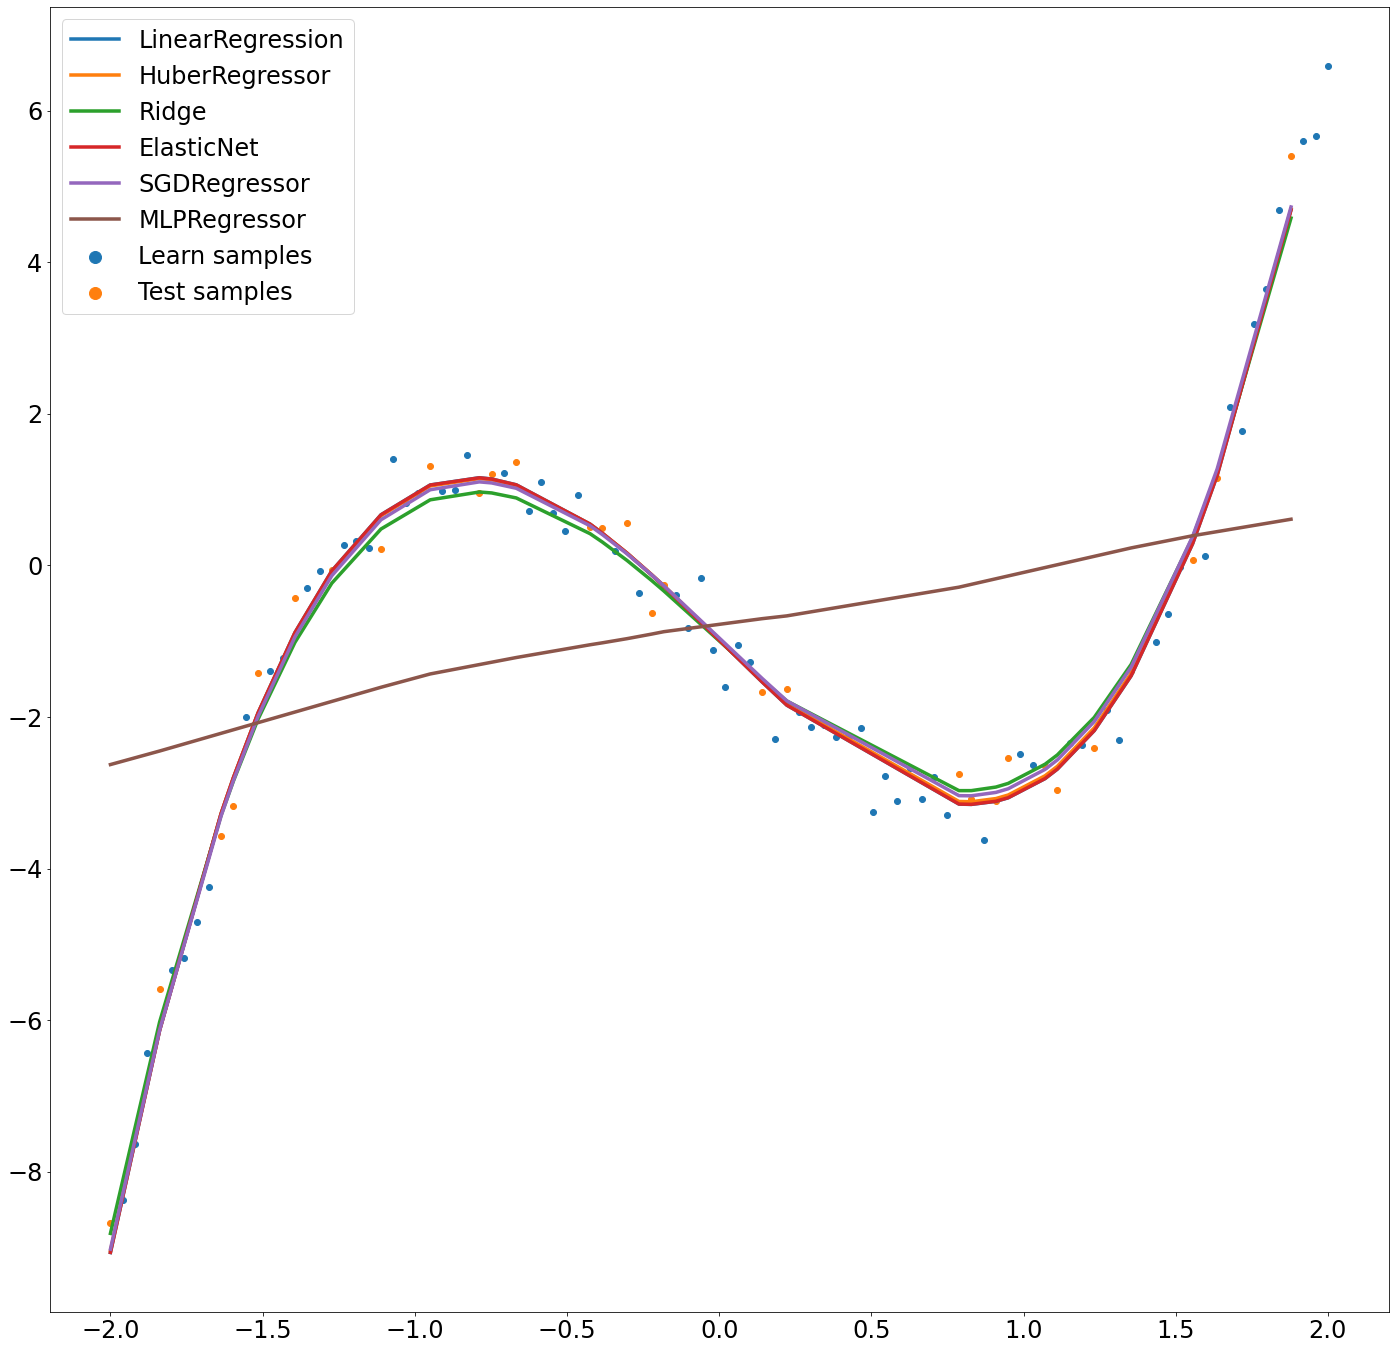

In [33]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [34]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# Deg = 4

In [35]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

In [36]:
deg = 4

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [37]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(4,))

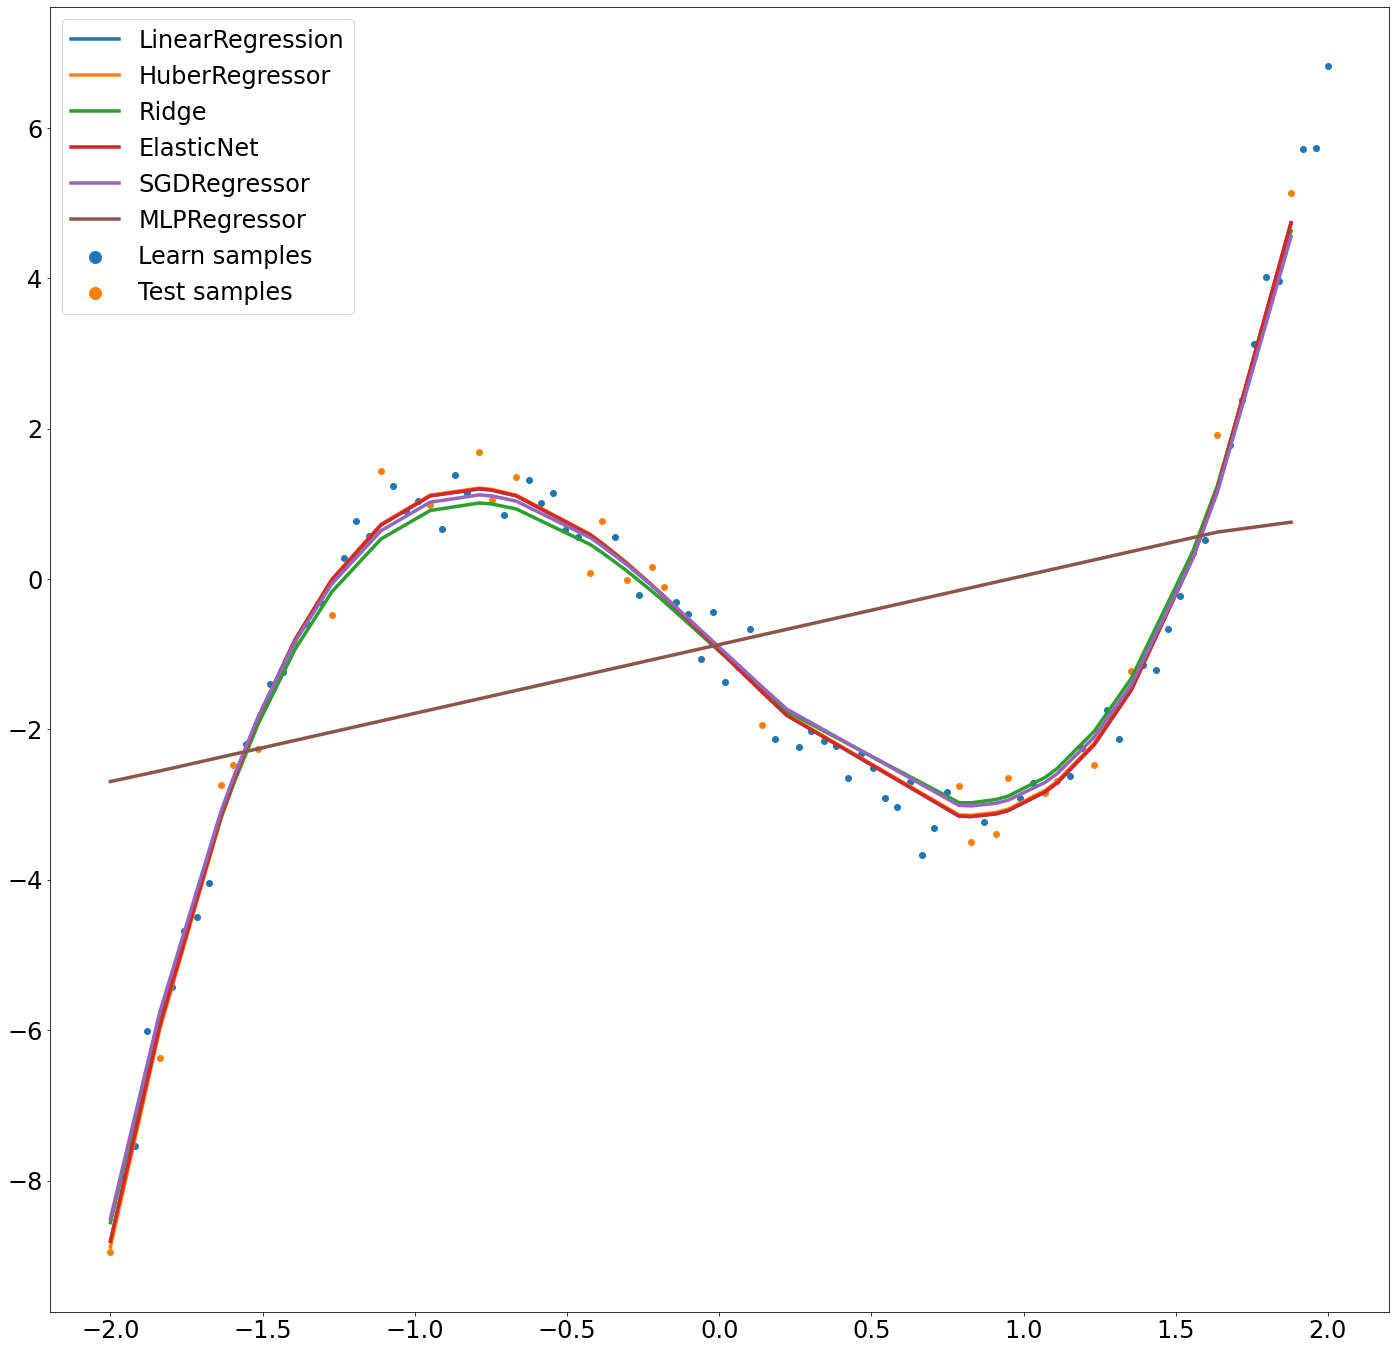

In [38]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [39]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# Deg = 5

In [40]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)

In [41]:
deg = 5

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [42]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026504964439356016, tolerance: 5.226628508130938e-13
  model = cd_fast.enet_coordinate_descent(
c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(5,))

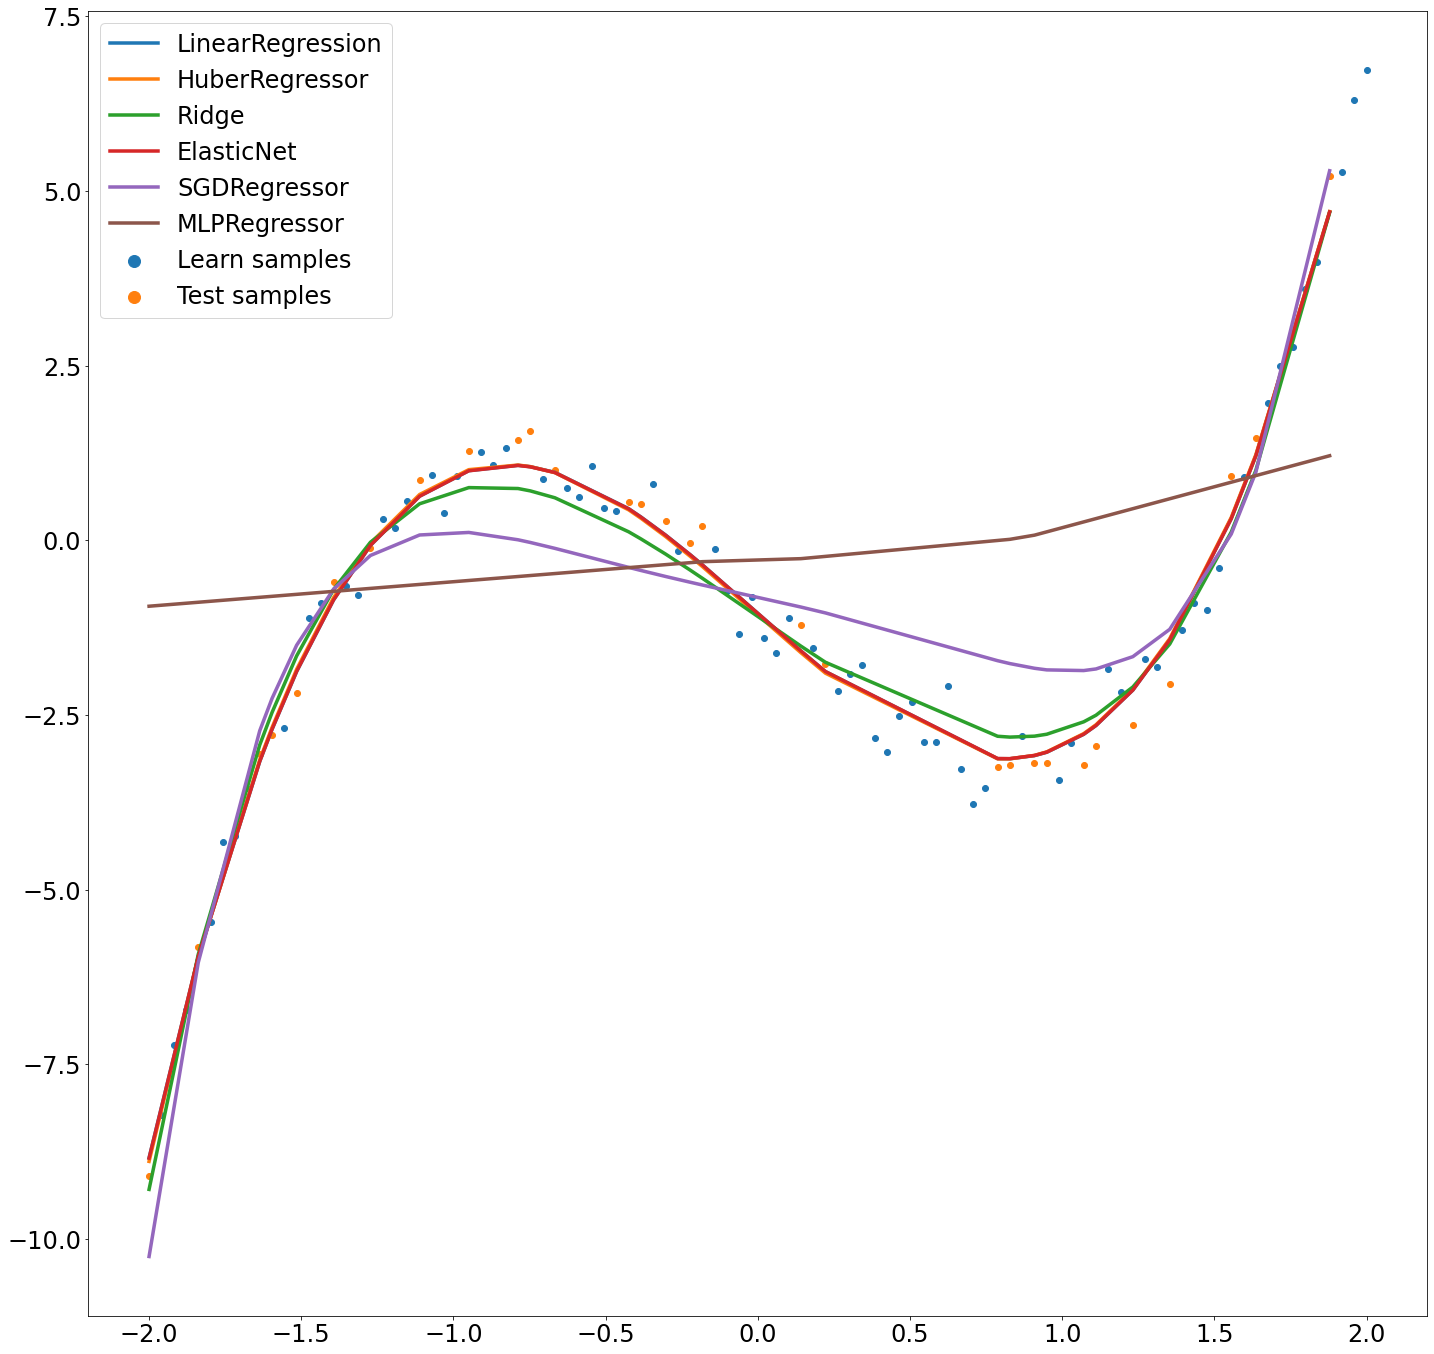

In [43]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [44]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# 10 Samples with noise

# Deg = 2

In [45]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 10
index = random.sample(range(y_train.shape[0]), n_samples)
y_train[index] += np.abs(np.random.normal(0.0, 8, n_samples))

In [46]:
deg = 2

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [47]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(2,))

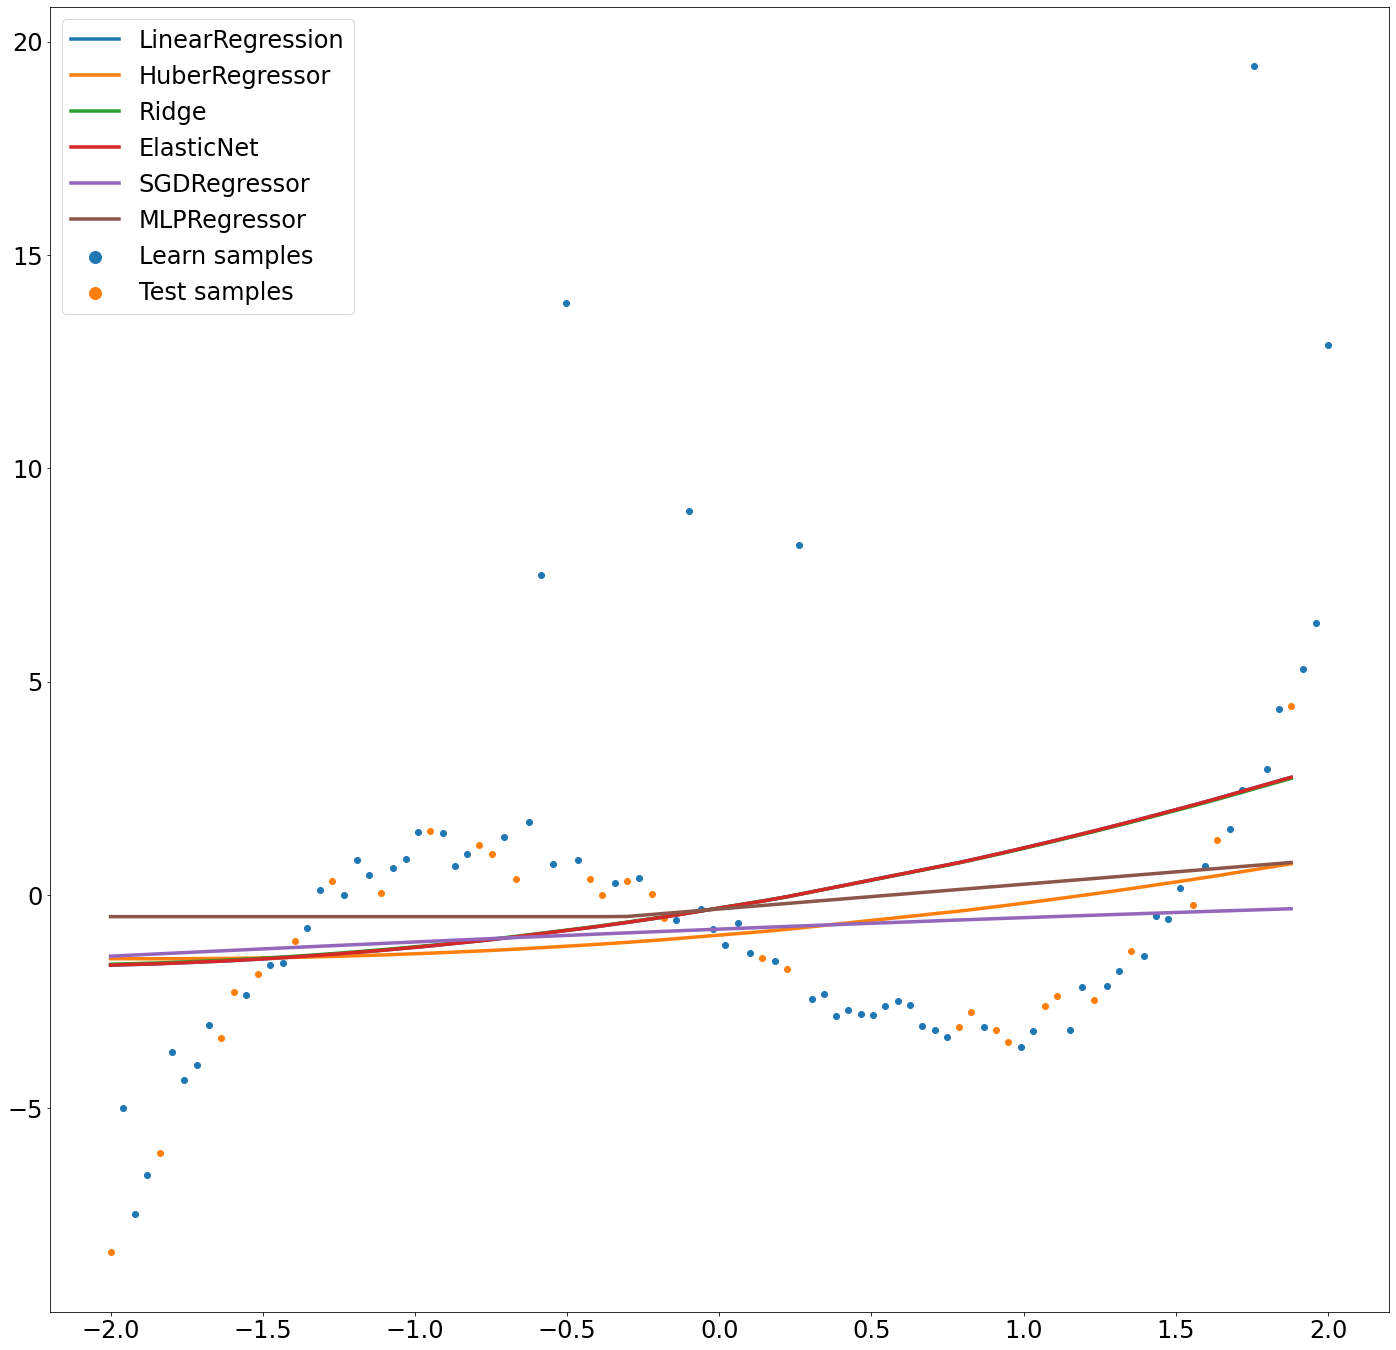

In [48]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [49]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# Deg = 3

In [50]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 10
index = random.sample(range(y_train.shape[0]), n_samples)
y_train[index] += np.abs(np.random.normal(0.0, 8, n_samples))

In [51]:
deg = 3

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [52]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(3,))

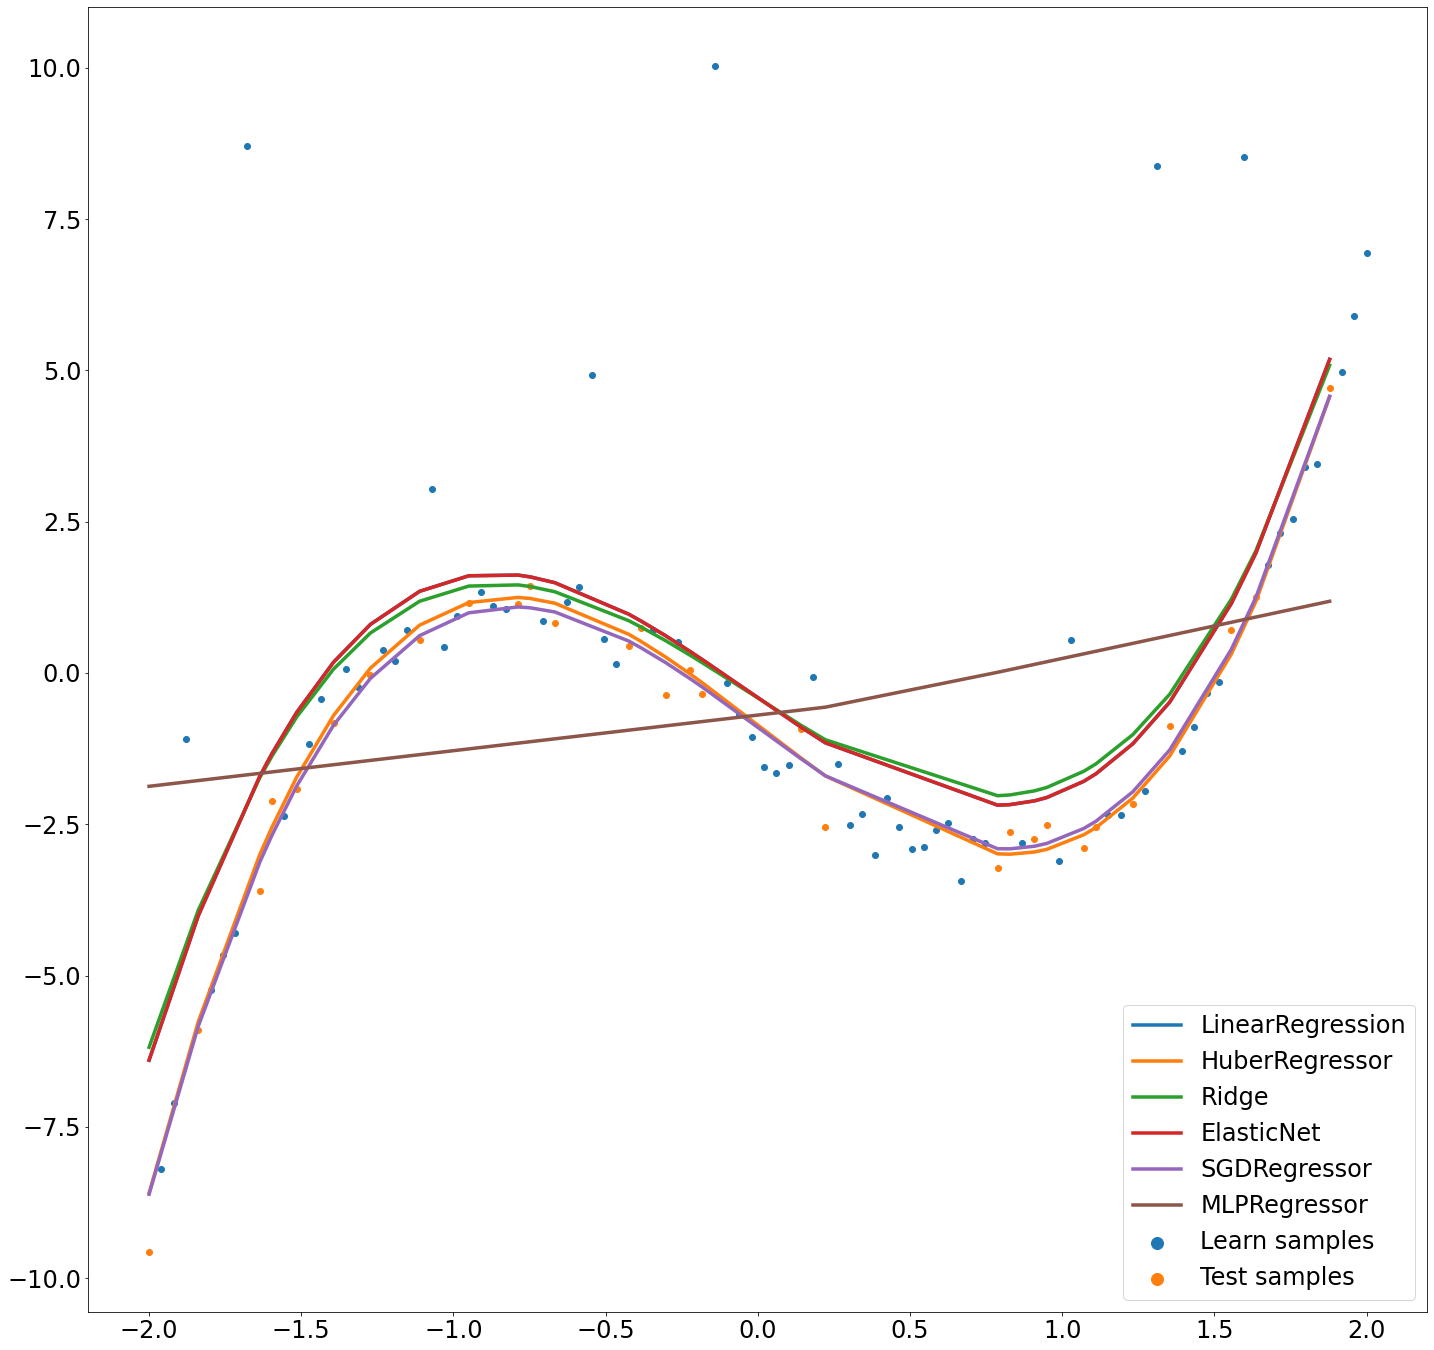

In [53]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [54]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# Deg = 4

In [55]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 10
index = random.sample(range(y_train.shape[0]), n_samples)
y_train[index] += np.abs(np.random.normal(0.0, 8, n_samples))

In [56]:
deg = 4

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [57]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(4,))

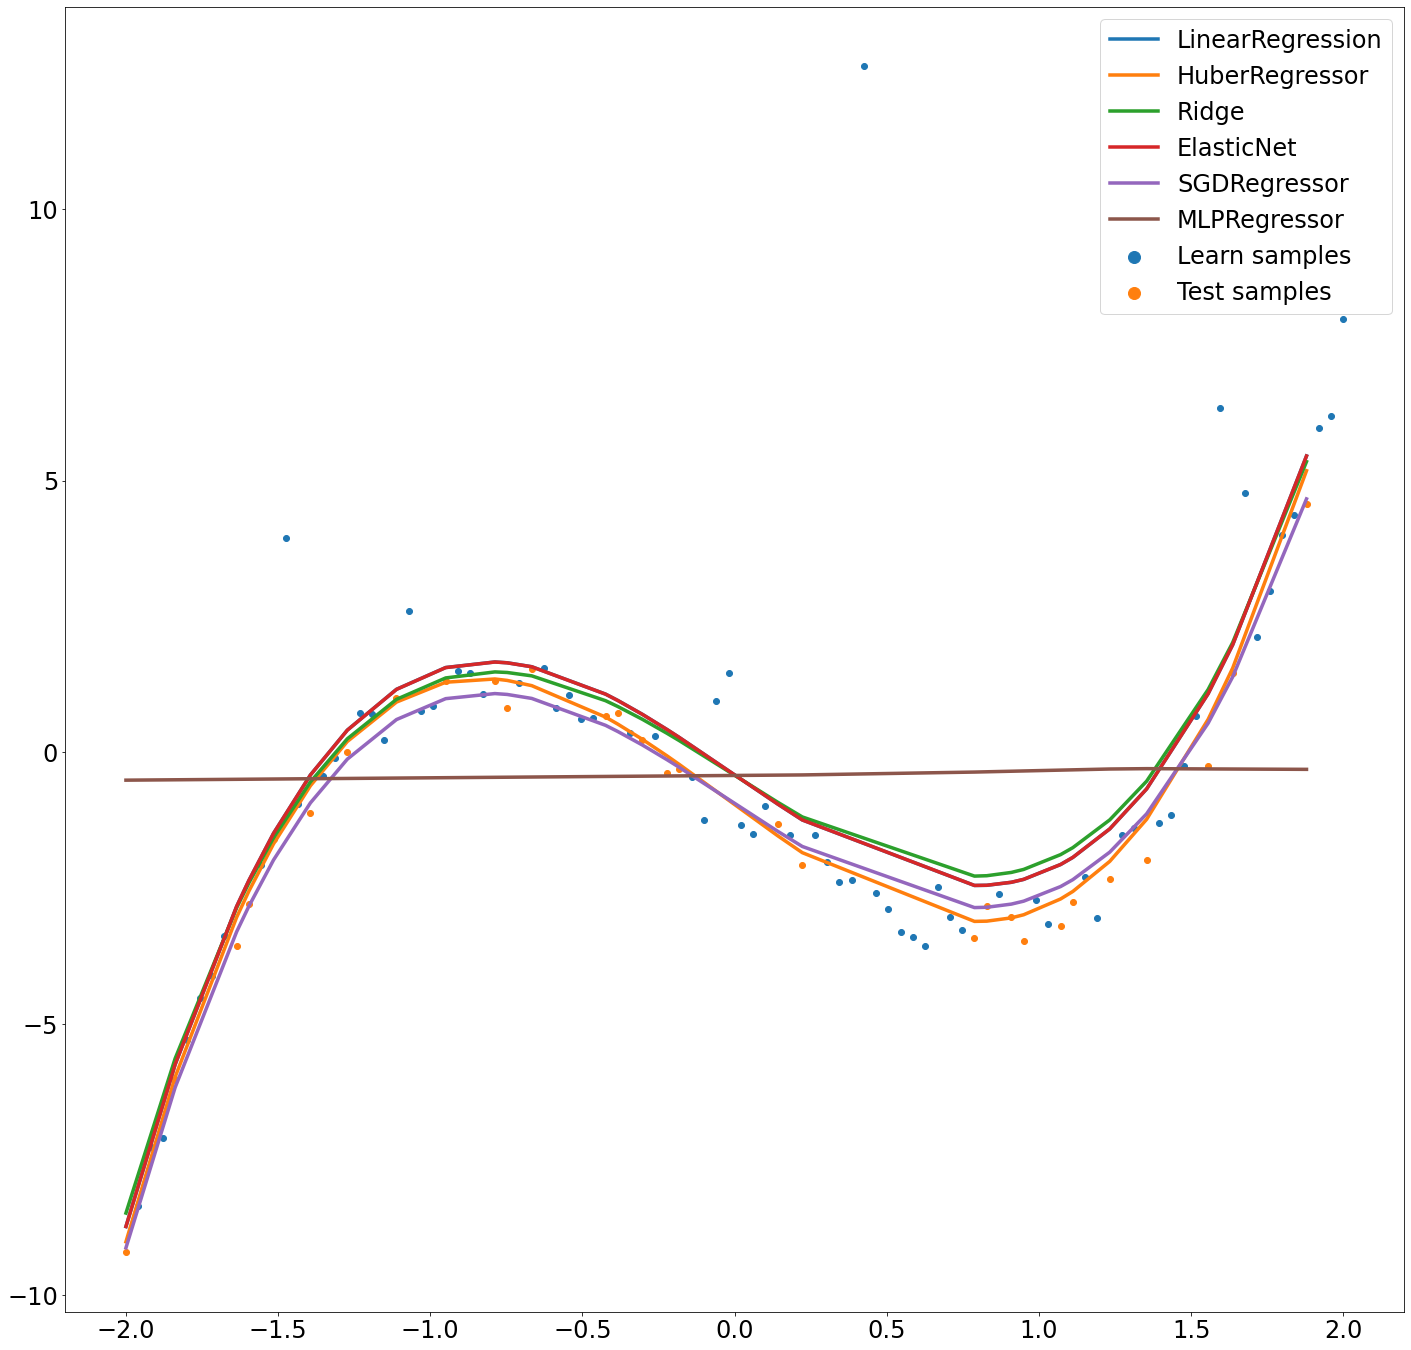

In [58]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [59]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

# Deg = 5

In [60]:
X, Y = generateNonLinear(100, 2, -4, -1, 0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, train_size=0.7)
X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
n_samples = 10
index = random.sample(range(y_train.shape[0]), n_samples)
y_train[index] += np.abs(np.random.normal(0.0, 8, n_samples))

In [61]:
deg = 5

linear_regression = make_pipeline(PolynomialFeatures(deg), LinearRegression())
huber = make_pipeline(PolynomialFeatures(deg), HuberRegressor())
ridge = make_pipeline(PolynomialFeatures(deg), Ridge())
elastic_net = make_pipeline(PolynomialFeatures(deg), ElasticNet(alpha=1e-4, tol=1e-15))
sgd_regressor = make_pipeline(PolynomialFeatures(deg), SGDRegressor(max_iter=1000, learning_rate="constant", penalty="l2", loss="huber",tol=1e-15))
mlp_regressor = MLPRegressor(hidden_layer_sizes=(deg,))


In [62]:
linear_regression.fit(X_train, y_train)
huber.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
sgd_regressor.fit(X_train, y_train)
mlp_regressor.fit(X_train, y_train)


c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11023536878533946, tolerance: 6.246510981260531e-13
  model = cd_fast.enet_coordinate_descent(
c:\users\gl503\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(5,))

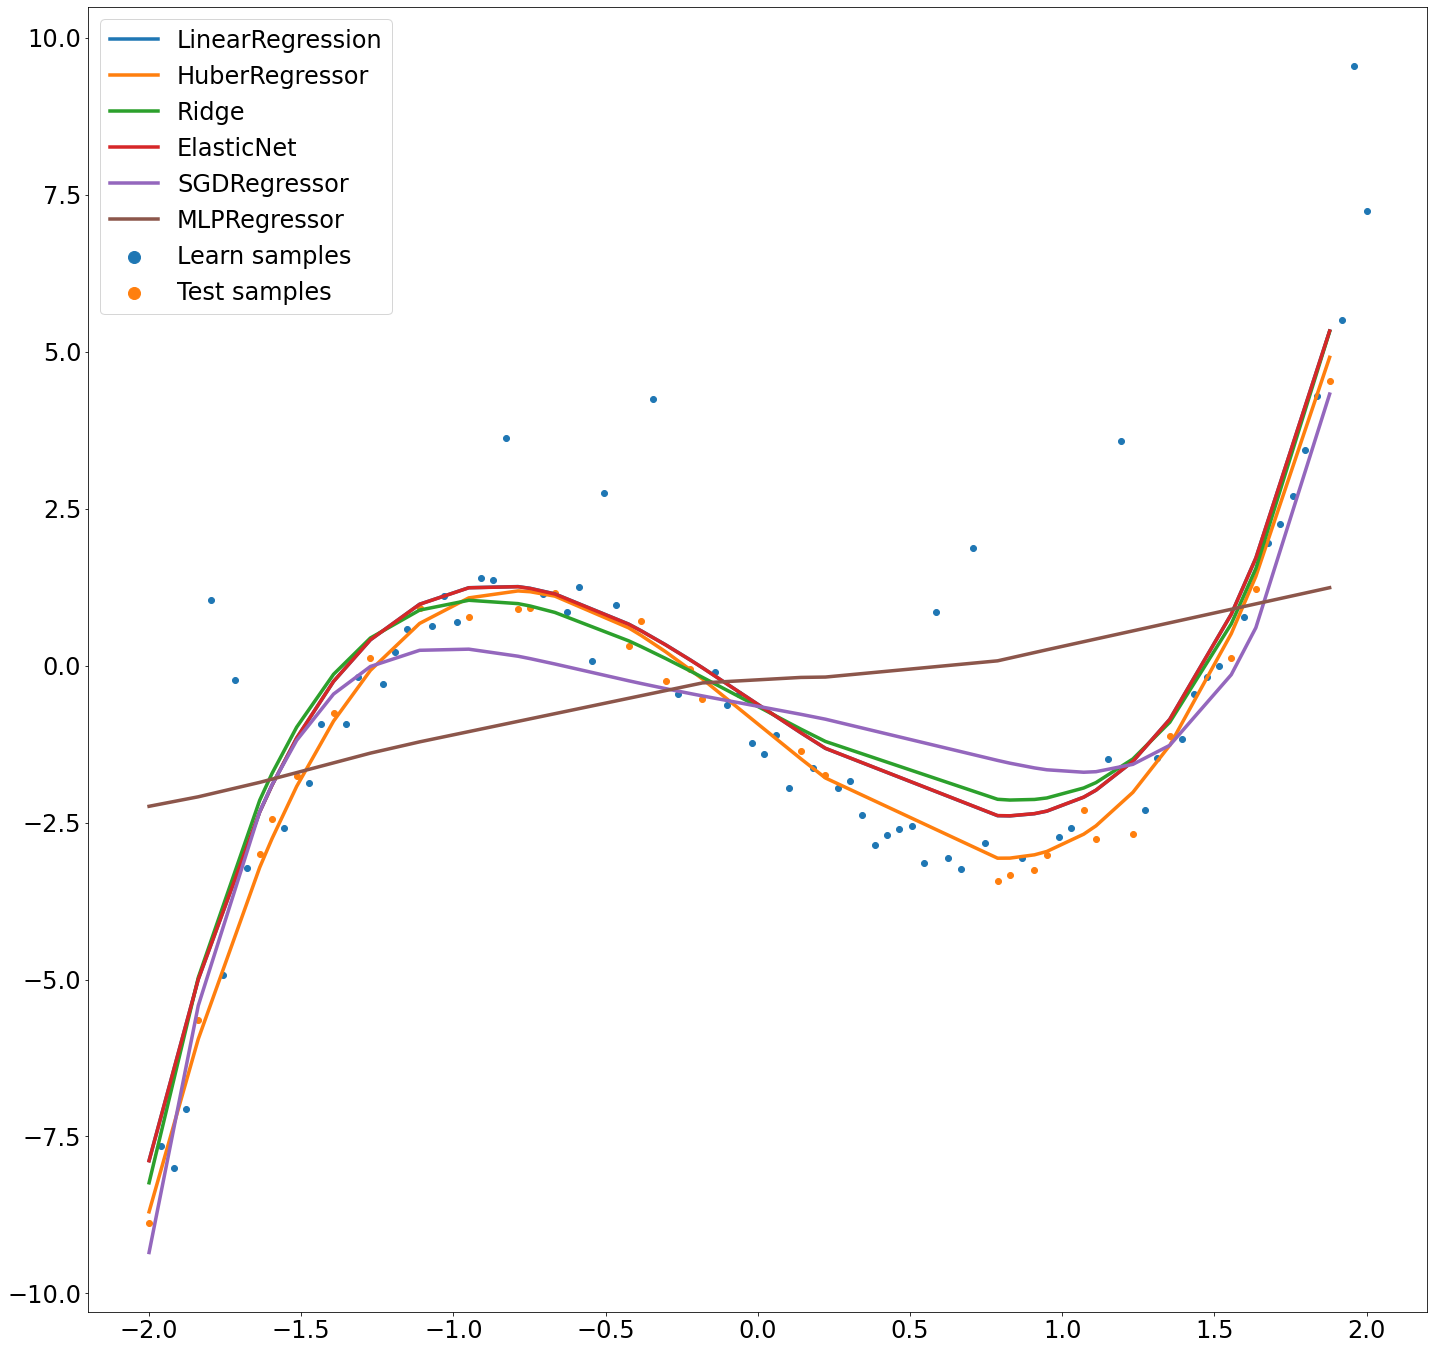

In [63]:
regressors = [linear_regression, huber, ridge, elastic_net, sgd_regressor, mlp_regressor]

fig = plt.figure(1, figsize=(24, 24))
ax = fig.add_subplot(111)
ax.scatter(X_train, y_train, label="Learn samples")
ax.scatter(X_test, y_test, label="Test samples")

X_test = np.sort(X_test, axis=0)

for regressor in regressors:
    ax.plot(X_test, regressor.predict(X_test), linewidth=3.5, label=type(regressor[1]).__name__ if type(regressor).__name__ == "Pipeline" else type(regressor).__name__)
ax.legend(markerscale=2)
plt.show()

In [64]:
# df = pd.DataFrame(columns=["data_linearity", "pipeline", "regressor", "noise_size", "deg", "mean_squared_error", "mean_absolute_error"])

for regressor in regressors:
    to_append = ["Linear" if linearity else "Non Linear",
                 True if type(regressor).__name__ in ["Pipeline", "MLPRegressor"] else False,
                type(regressor[1]).__name__ if type(regressor).__name__ in "Pipeline" else type(regressor).__name__,
                 n_samples,
                 deg,
                 mean_squared_error(y_test, regressor.predict(X_test)),
                 mean_absolute_error(y_test, regressor.predict(X_test))]
    to_append = pd.Series(to_append, index=df.columns)
    df = df.append(to_append, ignore_index=True)

In [65]:
pd.set_option('display.max_rows', None) 
df.groupby(["data_linearity", "noise_size", "pipeline", "deg", "regressor"]).mean()

mean_squared_error  \
data_linearity noise_size pipeline deg regressor                              
Linear         0          False    0   ElasticNet                  0.039101   
                                       HuberRegressor              0.039869   
                                       LinearRegression            0.039103   
                                       Ridge                       0.039500   
                                       SGDRegressor                0.040115   
               10         False    0   ElasticNet                  1.208979   
                                       HuberRegressor              0.040847   
                                       LinearRegression            1.208879   
                                       Ridge                       1.227366   
                                       SGDRegressor                0.042979   
Non Linear     0          False    0   ElasticNet                  6.416141   
                                       HuberRegressor              6.196405   
                                       LinearRegression            6.416218   
                                       Ridge                       6.405394   
                                       SGDRegressor                6.406170   
                          True     2   ElasticNet                  7.236058   
                                       HuberRegressor              6.755089   
                                       LinearRegression            7.236161   
                                       MLPRegressor                8.673222   
                                       Ridge                       7.219564   
                                       SGDRegressor                6.819367   
                                   3   ElasticNet                 14.729068   
                                       HuberRegressor             14.663847   
                                       LinearRegression           14.732719   
                                       MLPRegressor                6.520321   
                                       Ridge                      14.024278   
                                       SGDRegressor               14.515944   
                                   4   ElasticNet                 14.884882   
                                       HuberRegressor             14.920645   
                                       LinearRegression           14.888510   
                                       MLPRegressor                7.269498   
                                       Ridge                      14.204861   
                                       SGDRegressor               14.327958   
                                   5   ElasticNet                 14.970604   
                                       HuberRegressor             14.975170   
                                       LinearRegression           14.974607   
                                       MLPRegressor                7.923583   
                                       Ridge                      14.353461   
                                       SGDRegressor               13.638922   
               10         False    0   ElasticNet                  8.117227   
                                       HuberRegressor              6.383121   
                                       LinearRegression            8.117406   
                                       Ridge                       8.088223   
                                       SGDRegressor                6.679605   
                          True     2   ElasticNet                  7.922211   
                                       HuberRegressor              5.944852   
                                       LinearRegression            7.922351   
                                       MLPRegressor                6.753906   
                                       Ridge                       7.899532   
                            